In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
from pypalettes import load_cmap

# Load the palette
cmap = load_cmap("youngturqs")
palette = [cmap(i / 10) for i in range(10)]  # Adjust granularity

# Set the palette globally in seaborn
sns.set_palette(palette)


In [345]:
# importing data using pd.read_csv
noshow = pd.read_csv("hospital_noshow.csv")

In [346]:
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Univeriate Analysis

In [347]:
## Performing Univeriate Analysis on Age column
noshow["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

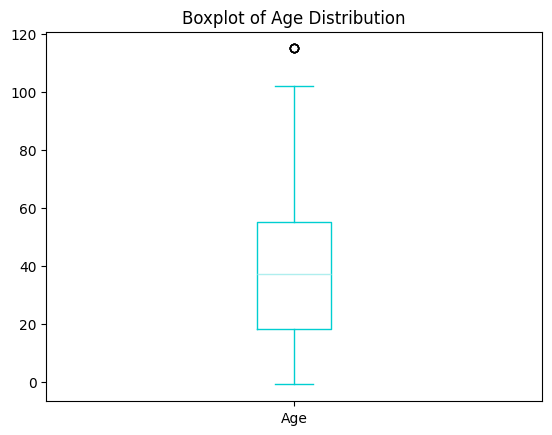

In [348]:
# plotting scatter plot to identify outliers 

noshow["Age"].plot(kind="box")
plt.title('Boxplot of Age Distribution')
plt.show()

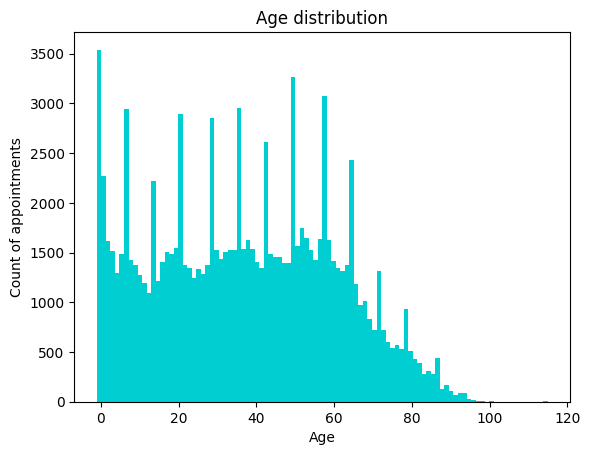

In [349]:
# checking the distribution of age 

noshow["Age"].plot(kind="hist",bins=100)
plt.xlabel('Age')
plt.ylabel('Count of appointments')
plt.title('Age distribution')
plt.show()

## Conclusion on Age Column:
```
-There appears to be an issue with the "Age" column, as it contains negative values, which are not possible. Additionally, some values exceed 100, which could be highly unlikely, as it is rare for individuals to live beyond this age.

- Outliers in the data can be easily identified through the boxplot visualization.

- The minimum value recorded is -1, and the maximum value is 115.

- The "Age" variable is not normally distributed and exhibits a positive skew. This could be due to the presence of patients ranging from infants (age 0) to those up to 100 years old in the hospital.

- A significant proportion of the patients are infants.
```

In [350]:
## this can possibliy an error so lets round it to 0
noshow[noshow["Age"]<0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
99832,4.660000e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [351]:
# Rounding all the negative values in out age column to zero 
noshow['Age']= noshow['Age'].clip(lower=0)

In [352]:
# chekcing whether value is rounded to zero or not 
len(noshow.query("Age<0"))

0

In [353]:
# it is possible that age can be 0 as they can be infants who are younger than 1 year 
len(noshow.query("Age==0"))

3540

In [354]:
# we are not considering values above 100 as it can affect out analysis
noshow[noshow['Age']>100]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
58014,9.760000e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.200000e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.200000e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.200000e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.200000e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.340000e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.480000e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [355]:
# Filtering data As per our above conditions
noshow1 = noshow[noshow["Age"]<100].copy()

In [356]:
noshow1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110516 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110516 non-null  float64
 1   AppointmentID   110516 non-null  int64  
 2   Gender          110516 non-null  object 
 3   ScheduledDay    110516 non-null  object 
 4   AppointmentDay  110516 non-null  object 
 5   Age             110516 non-null  int64  
 6   Neighbourhood   110516 non-null  object 
 7   Scholarship     110516 non-null  int64  
 8   Hipertension    110516 non-null  int64  
 9   Diabetes        110516 non-null  int64  
 10  Alcoholism      110516 non-null  int64  
 11  Handicap        110516 non-null  int64  
 12  SMS_Received    110516 non-null  int64  
 13  No_Show         110516 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Data Transformation for Enhanced Analysis and Optimization:
```
- The "Gender" and "Handicap" columns should be transformed into categorical data types.

- The "Day" columns need to be converted to datetime data types for accurate temporal analysis.

- Boolean columns, including "Scholarship," "Hypertension," "Diabetes," "Alcoholism," "SMSReceived," and "No_Show," should be converted to boolean data types to ensure consistency and ease of analysis.
```

In [357]:
## dropping Appointment_id column as thier is patient id 
noshow1.drop(['AppointmentID'], axis = 1, inplace = True)

In [358]:
## converting No_Show column to Bool type 
noshow1['No_Show'] = noshow1['No_Show'].map({"No": False, "Yes": True})

In [359]:
## trasnforming ScheduledDay and AppointmentDay to datetime format
for col in ["ScheduledDay", "AppointmentDay"]:
    noshow1[col]= pd.to_datetime(noshow[col])

In [360]:
## converting Gender and Handicap Column to Category type
noshow1 = noshow1.astype({
                          'Gender':'category',
                          'Handicap': 'category',
                         
                         })


In [361]:
## converting required columns to bool type 
noshow1 = noshow1.astype({
                          'Scholarship': 'bool',
                         'Hipertension': "bool",
                          'Diabetes': "bool",
                         'Alcoholism': 'bool',
                        "SMS_Received": "bool"
                         })

In [362]:
# Noshow Rate 
noshow_rate = noshow1['No_Show'].sum()/len(noshow1)
print(noshow_rate)

0.20192551304788448


In [363]:
# lets plot count_plot anlaysie further for better analysis
def count_plot(fdata, fxdata, fxlabel, fylabel, ftitle):
    graph = sns.countplot(data= fdata, x = fxdata)
    plt.xlabel(fxlabel)
    plt.ylabel(fylabel)
    plt.title(ftitle)
    return graph

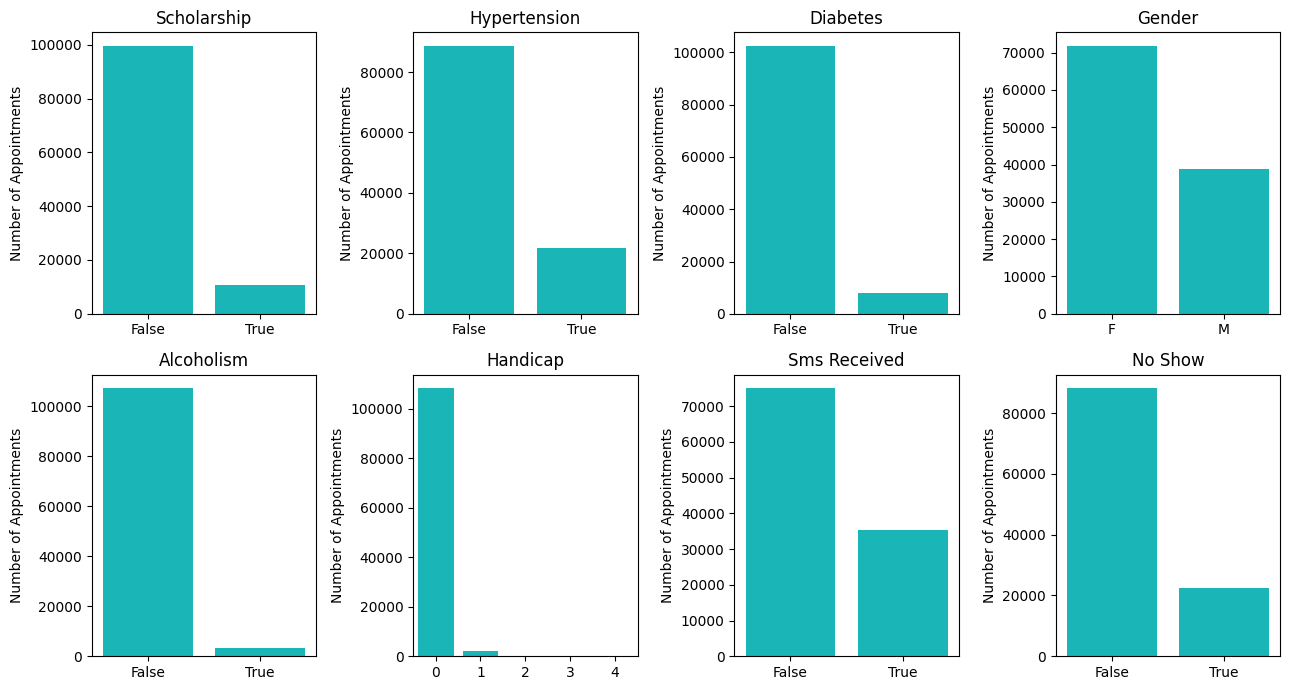

In [364]:
plt.figure(figsize=(13,7))

plt.subplot(2,4,1)
count_plot(noshow1, 'Scholarship',"",'Number of Appointments','Scholarship')

plt.subplot(2,4,2)
count_plot(noshow1,'Hipertension', '', "Number of Appointments", 'Hypertension')

plt.subplot(2,4,3)
count_plot(noshow1,'Diabetes', '', 'Number of Appointments','Diabetes')

plt.subplot(2,4,4)
count_plot(noshow1,'Gender', '', 'Number of Appointments','Gender')

plt.subplot(2,4,5)
count_plot(noshow1,'Alcoholism','', 'Number of Appointments','Alcoholism')

plt.subplot(2,4,6)
count_plot(noshow1,'Handicap', '','Number of Appointments','Handicap')

plt.subplot(2,4,7)
count_plot(noshow1,'SMS_Received', '', 'Number of Appointments','Sms Received')

plt.subplot(2,4,8)
count_plot(noshow1,'No_Show','', 'Number of Appointments','No Show')

plt.tight_layout()
plt.show()

## Insights from Count Plots:
```
- A significant proportion of individuals have hypertension and diabetes, which may contribute to a higher likelihood of missed appointments due to medical emergency.

- There are individuals who consume alcohol, which could also be a factor contributing to appointment no-shows.

- A large number of people have received SMS notifications, which could potentially reduce the no-show rate.

-Further analysis is required to understand the impact of "Handicap" on appointment attendance.
```

In [365]:
# Analysing Handicap column
noshow1['Handicap'].value_counts()

Handicap
0    108281
1      2036
2       183
3        13
4         3
Name: count, dtype: int64

C:\Users\mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


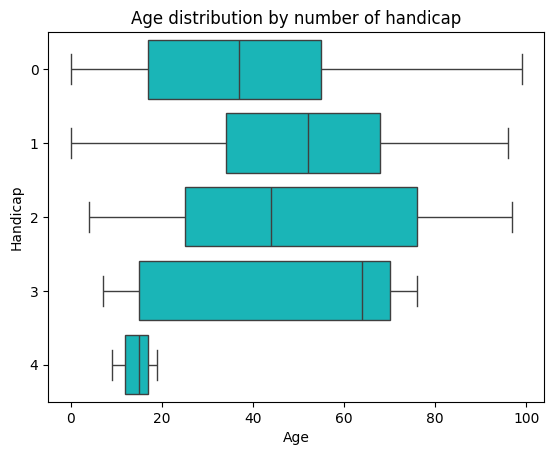

In [366]:
# boxplot of Handicap column

sns.boxplot(data=noshow1, x='Age' , y='Handicap', orientation='horizontal')
plt.title("Age distribution by number of handicap")
plt.show()


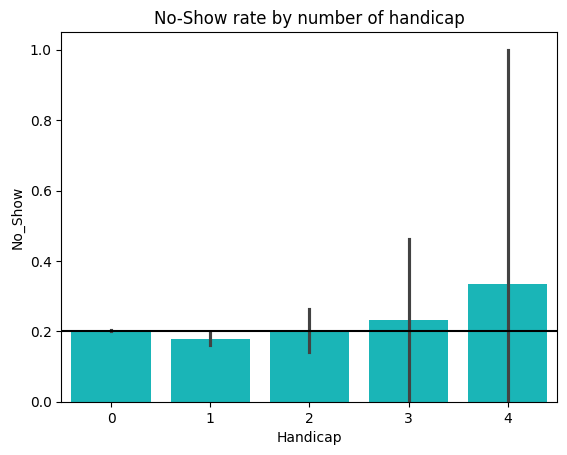

In [367]:
# Bar plot of Handicap column with axhline 

sns.barplot(x='Handicap', y='No_Show', data= noshow1)
plt.axhline(noshow_rate, color='black')
plt.title("No-Show rate by number of handicap")
plt.show()

## Insights from "Handicap" Column:
```
- The bar plot reveals that the number of individuals with different handicap levels does not significantly influence the no-show rate for appointments. Handicap levels 0, 1, and 2 exhibit similar no-show rates with minimal variability, indicating consistent behavior across these groups.

- However, Handicap levels 3 and 4 display large error bars due to a very small number of observations, making these levels statistically unreliable.

-As a result, we have decided to exclude these rows from our analysis to prevent any potential distortion of our conclusions.
```

In [368]:
## filtering data that we want to keep for handicap column 
noshow1 = noshow1[noshow1['Handicap'].isin([0,1,2])]

## Bivariate Analysis

In [369]:
## Gender 
noshow1['Gender'].value_counts()

Gender
F    71827
M    38673
Name: count, dtype: int64

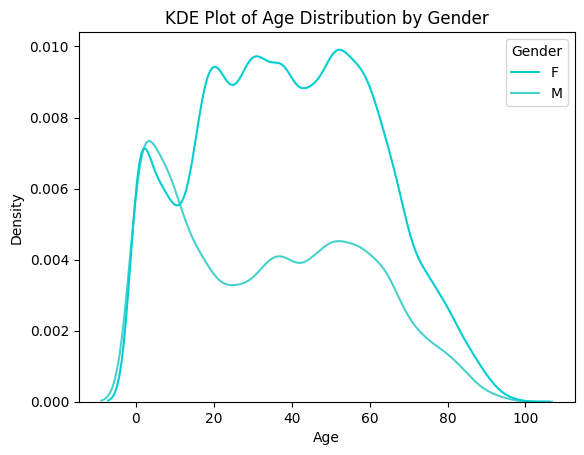

In [370]:
# Kde plot of gender and Age

sns.kdeplot(data=noshow1, x='Age',hue='Gender')
plt.title("KDE Plot of Age Distribution by Gender")
plt.show()

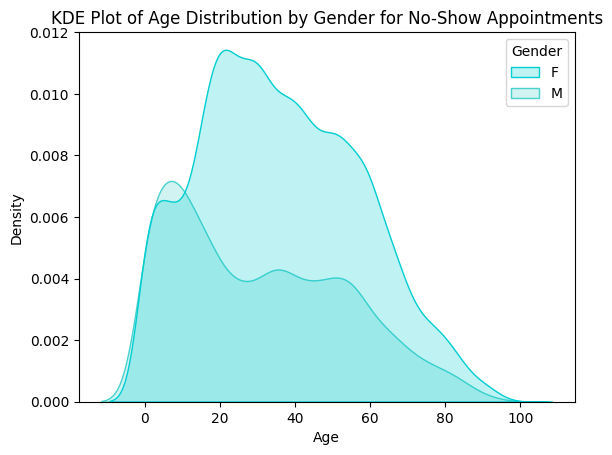

In [371]:
## identifying which gender do not show up often

sns.kdeplot(data=noshow1[noshow1['No_Show']==True], x='Age', hue='Gender', fill=True)
plt.title("KDE Plot of Age Distribution by Gender for No-Show Appointments")
plt.show()

In [372]:
# performing cross tabulation so that we can identify which gender do not appear most often 

pd.crosstab(noshow1['No_Show'], noshow1['Gender'],normalize ='columns')*100

Gender,F,M
No_Show,,
False,79.687304,80.032581
True,20.312696,19.967419


## Insights from Gender Column:
```
- The KDE plot suggests that females are more likely to miss appointments than males, particularly between the ages of 10 and 40.

- However, upon further investigation using cross-tabulation, we found that both males and females miss an equal number of appointments, indicating no significant gender-based difference in no-show rates.
```

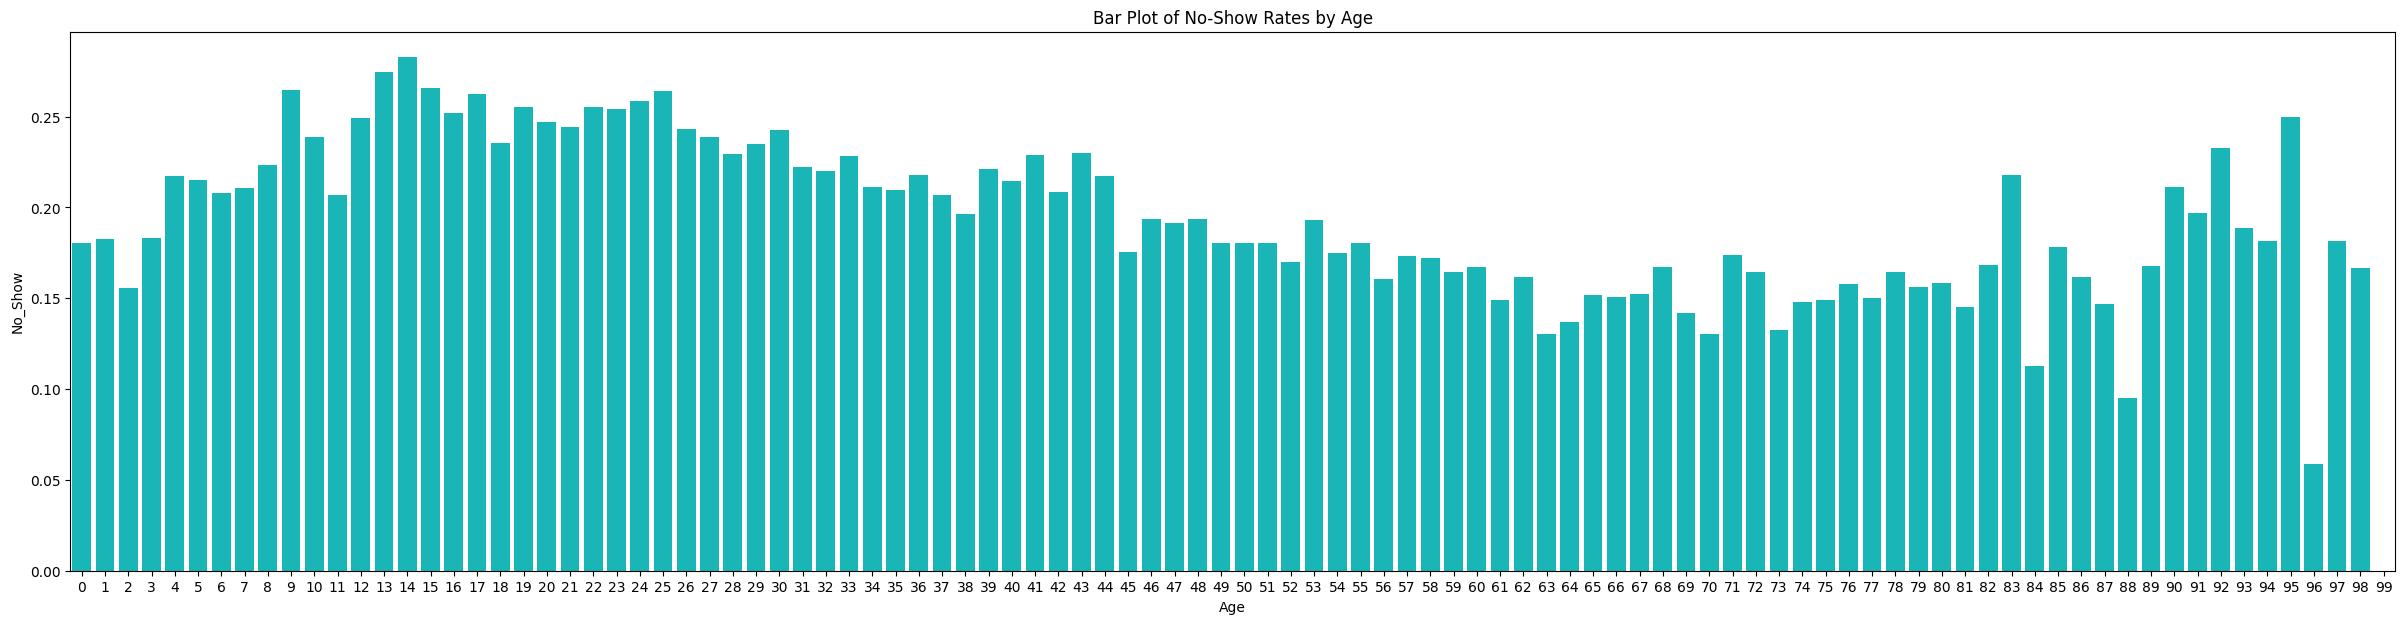

In [373]:
# identifying which age group do not appear most often with the help of barplot

plt.figure(figsize=(30,7))
sns.barplot(x='Age', y='No_Show', data=noshow1, errorbar= None)
plt.title("Bar Plot of No-Show Rates by Age")
plt.show()

## No-Show Trends by Age Group:
```
- The graph indicates that no-shows are more common among individuals aged between 10 and 30 years.

- After the age of 30, the no-show rate declines and then shows a gradual increase. However, this upward trend in later ages could be attributed to a smaller number of data points, which may affect the reliability of this observation.
```

In [374]:
# checking Schoarship effect on No Show
pd.crosstab(noshow1['No_Show'], noshow1['Scholarship'], normalize = 'columns')*100

Scholarship,False,True
No_Show,,
False,80.194502,76.263696
True,19.805498,23.736304


## Impact of Scholarship on No-Show Rate:
```
- Approximately 27% of individuals who received a scholarship did not show up for their appointments, which is higher compared to the 19% no-show rate among those who did not receive a scholarship.

- This suggests that offering scholarships may be associated with a higher no-show rate, and the company may experience better outcomes in terms of attendance when scholarships are not provided.
```

In [375]:
# checking Hipertension effect on noshow
pd.crosstab(noshow1['No_Show'], noshow1['Hipertension'], normalize='columns')*100

Hipertension,False,True
No_Show,,
False,79.097192,82.701041
True,20.902808,17.298959


## Impact of Hyptension on No-Show Rate:
```
- People with hypertension (82%) are slightly more likely to show up for their appointments compared to people without hypertension.
```

In [376]:
# checking Diabtes effect on noshow
pd.crosstab(noshow1['No_Show'], noshow1['Diabetes'], normalize='columns')*100

Diabetes,False,True
No_Show,,
False,79.63864,81.996727
True,20.36136,18.003273


## Impact of Diabetes on No-Show Rates:
```
- same for diabetes peope with diabetes (81%) are more likely to show up fot thier appointments compare to people without Diabetes
```

In [377]:
# cheking Alcoholism effect on Noshow
pd.crosstab(noshow1['No_Show'], noshow1['Alcoholism'], normalize='columns')*100

Alcoholism,False,True
No_Show,,
False,79.80736,79.833184
True,20.19264,20.166816


## Alcoholism Impact on No-Show Rates:
```
- Alcoholism makes no difference in no show rate.
```

In [378]:
# let she how Sms helps in reducing No Show
pd.crosstab(noshow1['No_Show'], noshow1['SMS_Received'], normalize='columns')*100

SMS_Received,False,True
No_Show,,
False,83.298678,72.426429
True,16.701322,27.573571


## Impact of SMS on No-Show Rates:
```
- Pople who received SMS have higher no show rates than people who dont.
```

In [379]:
## lets analyse using bar plot 
def bar_plot(fdata, fxdata, fydata, fxlabel, fylabel, fytitle,ferrorbar):
    graph = sns.barplot(data=fdata, x = fxdata, y = fydata, errorbar=ferrorbar)
    graph.set(xlabel= fxlabel, ylabel = fylabel, title = fytitle)
    graph.set_ylim(0,0.5)
    plt.axhline(noshow_rate,color='black')
    return graph

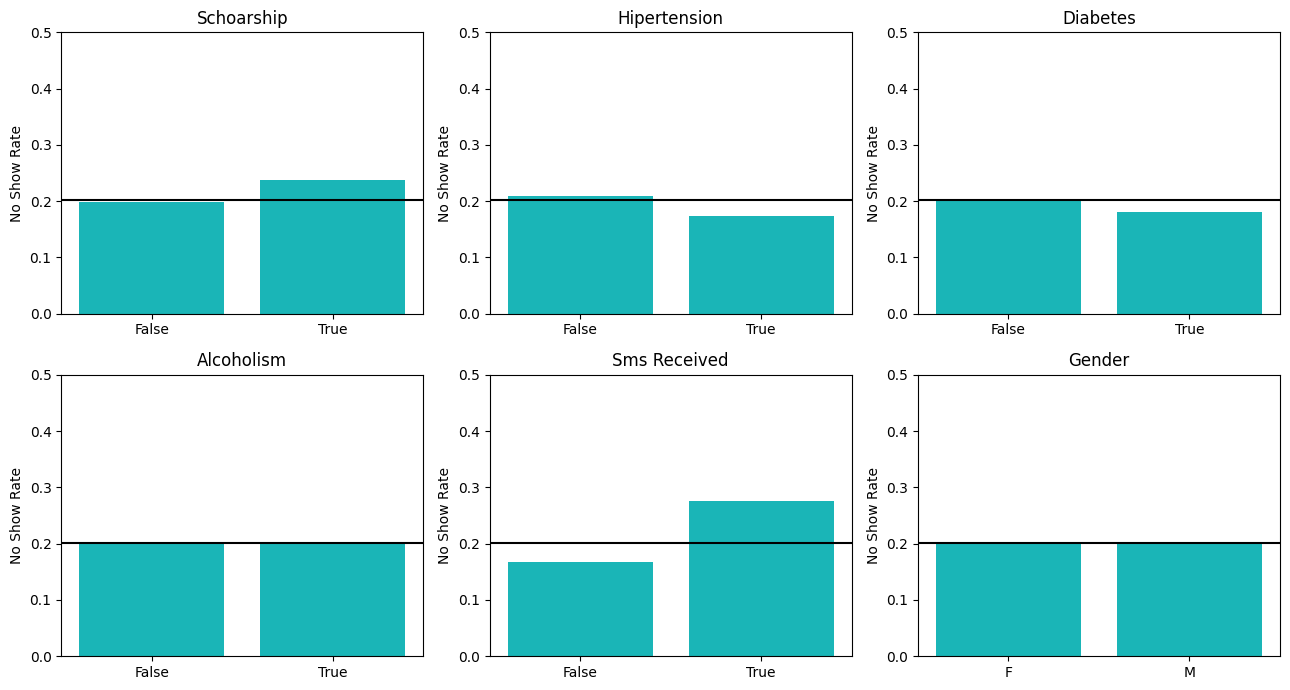

In [380]:
plt.figure(figsize=(13,7))

plt.subplot(2,3,1)
bar_plot(noshow1,'Scholarship','No_Show','','No Show Rate','Schoarship',None)

plt.subplot(2,3,2)
bar_plot(noshow1,'Hipertension', 'No_Show','','No Show Rate','Hipertension', None)

plt.subplot(2,3,3)
bar_plot(noshow1, 'Diabetes', 'No_Show', '', 'No Show Rate', 'Diabetes', None)

plt.subplot(2,3,4)
bar_plot(noshow1, 'Alcoholism', 'No_Show', '', 'No Show Rate', 'Alcoholism', None)

plt.subplot(2,3,5)
bar_plot(noshow1, 'SMS_Received', 'No_Show', '', 'No Show Rate', 'Sms Received', None)

plt.subplot(2,3,6)
bar_plot(noshow1, 'Gender', 'No_Show', '', 'No Show Rate', 'Gender', None)

plt.tight_layout()
plt.show()


## Bar Plot Analysis Summary:
```
- The findings from the bar plot align with our earlier conclusions derived from cross-tabulation.

- Individuals who received higher scholarship amounts tend to have a higher no-show rate.

- Patients with hypertension and diabetes exhibit a lower no-show rate, possibly due to the seriousness of their medical conditions.

- There appears to be no significant difference in no-show rates based on alcoholism or gender.

- Interestingly, individuals who received SMS reminders are more likely to miss their appointments, suggesting that SMS notifications alone may not be an effective intervention.
```

## We can now combine these risk categories to analyze their collective impact on the no-show rate.

In [381]:
## SMS Received and Scholarship received

riskcat1 = len(noshow1.query("No_Show == True and Scholarship == True and SMS_Received== True"))\
/len(noshow1.query("Scholarship== True and SMS_Received==True"))

print(f' If the person has received scholarship and SMS then thier chances of not showing up is ({riskcat1}) i.e. 33%.')

 If the person has received scholarship and SMS then thier chances of not showing up is (0.3378031383737518) i.e. 33%.


In [382]:
## person with hipertension , diabetes 

riskcat2 = len(noshow1.query("No_Show == True and Hipertension == True and Diabetes == True"))\
/len(noshow1.query("Hipertension== True and Diabetes == True"))

print(f' If the person has Hypertension and Diabetes then thier chances of not showing up is ({riskcat2}) i.e. 17%')

 If the person has Hypertension and Diabetes then thier chances of not showing up is (0.17591736046870182) i.e. 17%


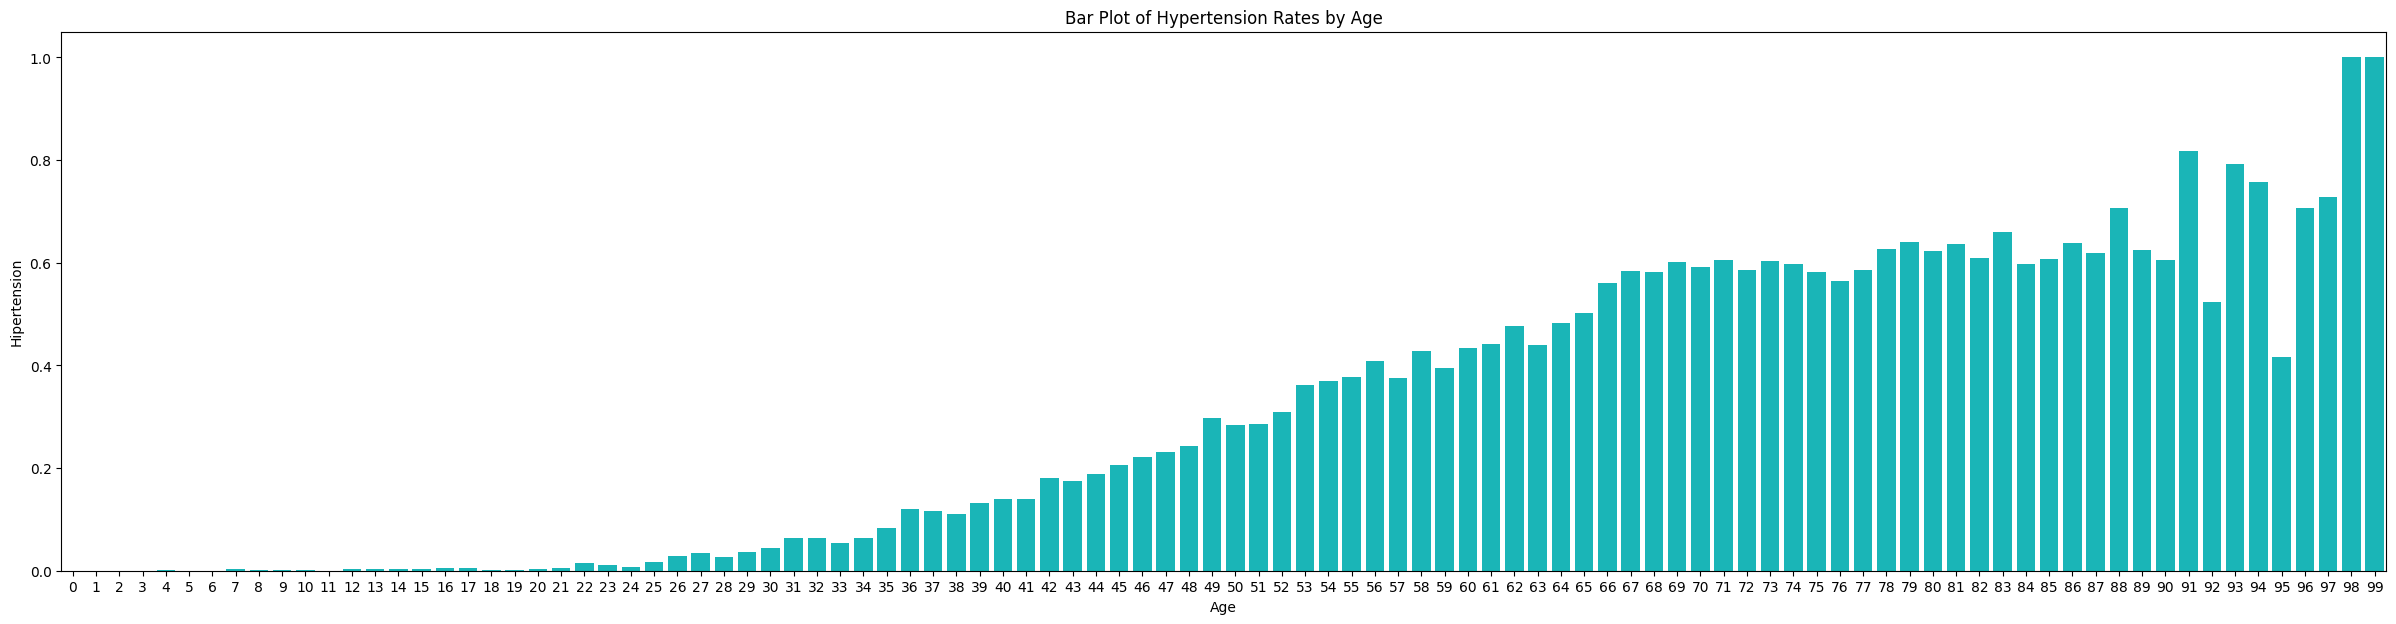

In [383]:
# pottting bar to identigy which age group is most affted by hypertension

plt.figure(figsize=(30,7))
sns.barplot(x='Age', y='Hipertension', data=noshow1, errorbar= None)
plt.title("Bar Plot of Hypertension Rates by Age")
plt.show()

## Relationship Between Age and Hypertension:
```
- Hypertension shows a positive correlation with age. As age increases, the prevalence of hypertension also rises.
```

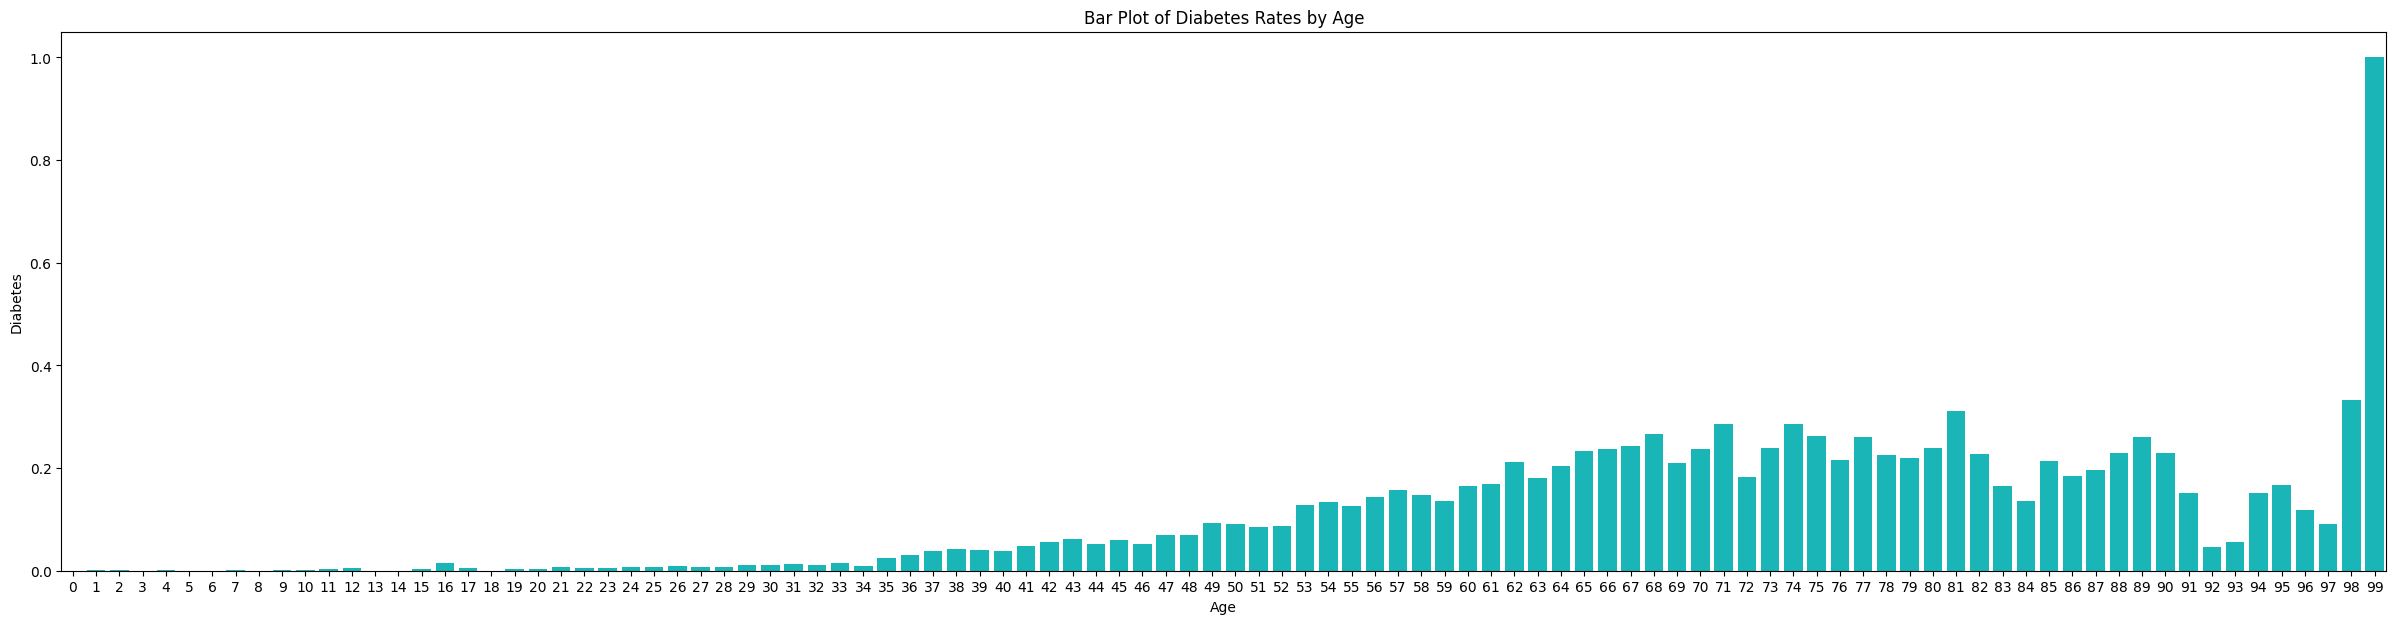

In [384]:
# pottting bar to identigy which age group is most affted by diabetes

plt.figure(figsize=(30,7))
sns.barplot(x='Age', y='Diabetes', data=noshow1, errorbar= None)
plt.title('Bar Plot of Diabetes Rates by Age')
plt.show()

## Relationship Between Age and Diabetes:
```
- Diabetes also exhibits a positive correlation with increasing age, indicating that older individuals are more likely to have diabetes.

- However, some volatility is observed in the older age range, which may be due to a smaller number of data points in that segment.
```

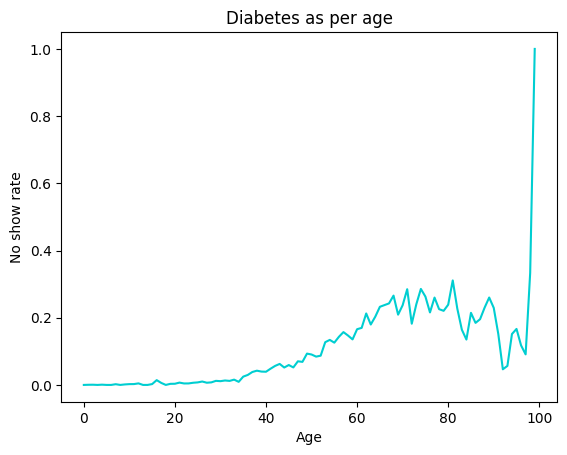

In [385]:
# the above is also confirmed by the following plot
# there are fewer data points for ages higher than 80 (check histogram above), that is why the upper end is so volatile

y_means = noshow1['Diabetes'].groupby(noshow1['Age']).mean()
x_age = noshow1['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('Diabetes as per age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.show()

In [386]:
# Age and Alcoholism

noshow1.groupby("Alcoholism")['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Alcoholism,,,,,,,,
False,107143.0,36.689695,23.242901,0.0,17.0,36.0,55.0,99.0
True,3357.0,49.575514,12.698696,4.0,41.0,50.0,59.0,85.0


In [387]:
## filtering out Alocholism under age 15

noshow1.query('Alcoholism ==True and Age < 15 ')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
6402,4.990000e+11,M,2016-05-11 07:32:26+00:00,2016-05-13 00:00:00+00:00,11,PARQUE MOSCOSO,True,False,False,True,0,False,False
17463,3.670000e+12,M,2016-05-13 07:21:38+00:00,2016-05-17 00:00:00+00:00,7,REDENÇÃO,False,False,False,True,0,False,False
17905,5.720000e+13,M,2016-05-02 14:47:48+00:00,2016-05-11 00:00:00+00:00,13,SANTA MARTHA,False,False,False,True,0,True,False
32817,2.650000e+12,M,2016-04-26 13:32:34+00:00,2016-05-12 00:00:00+00:00,5,RESISTÊNCIA,False,False,False,True,0,True,True
53536,3.480000e+13,M,2016-05-20 13:30:05+00:00,2016-05-20 00:00:00+00:00,12,SANTOS REIS,False,False,False,True,0,False,True
53549,3.480000e+13,M,2016-05-13 08:38:50+00:00,2016-05-13 00:00:00+00:00,12,SANTOS REIS,False,False,False,True,0,False,True
53587,3.480000e+13,M,2016-05-06 11:08:48+00:00,2016-05-06 00:00:00+00:00,12,SANTOS REIS,False,False,False,True,0,False,True
53733,3.480000e+13,M,2016-05-20 14:10:56+00:00,2016-05-20 00:00:00+00:00,12,SANTOS REIS,False,False,False,True,0,False,True
53746,3.480000e+13,M,2016-05-13 08:47:34+00:00,2016-05-13 00:00:00+00:00,12,SANTOS REIS,False,False,False,True,0,False,True
54757,3.480000e+13,M,2016-05-13 08:54:09+00:00,2016-05-13 00:00:00+00:00,12,SANTOS REIS,False,False,False,True,0,False,True


## Validating Alcohol Consumption Data:
```
- It is highly unlikely that children under the age of 15 consume alcohol. Therefore, records showing alcohol consumption for individuals below 15 years of age were removed, as they are likely the result of data entry errors.
```

In [388]:
## droping data for alcohol consumption for age under 15

noshow1 = noshow1[~((noshow1['Age'] < 15) & (noshow1['Alcoholism'] == True))]

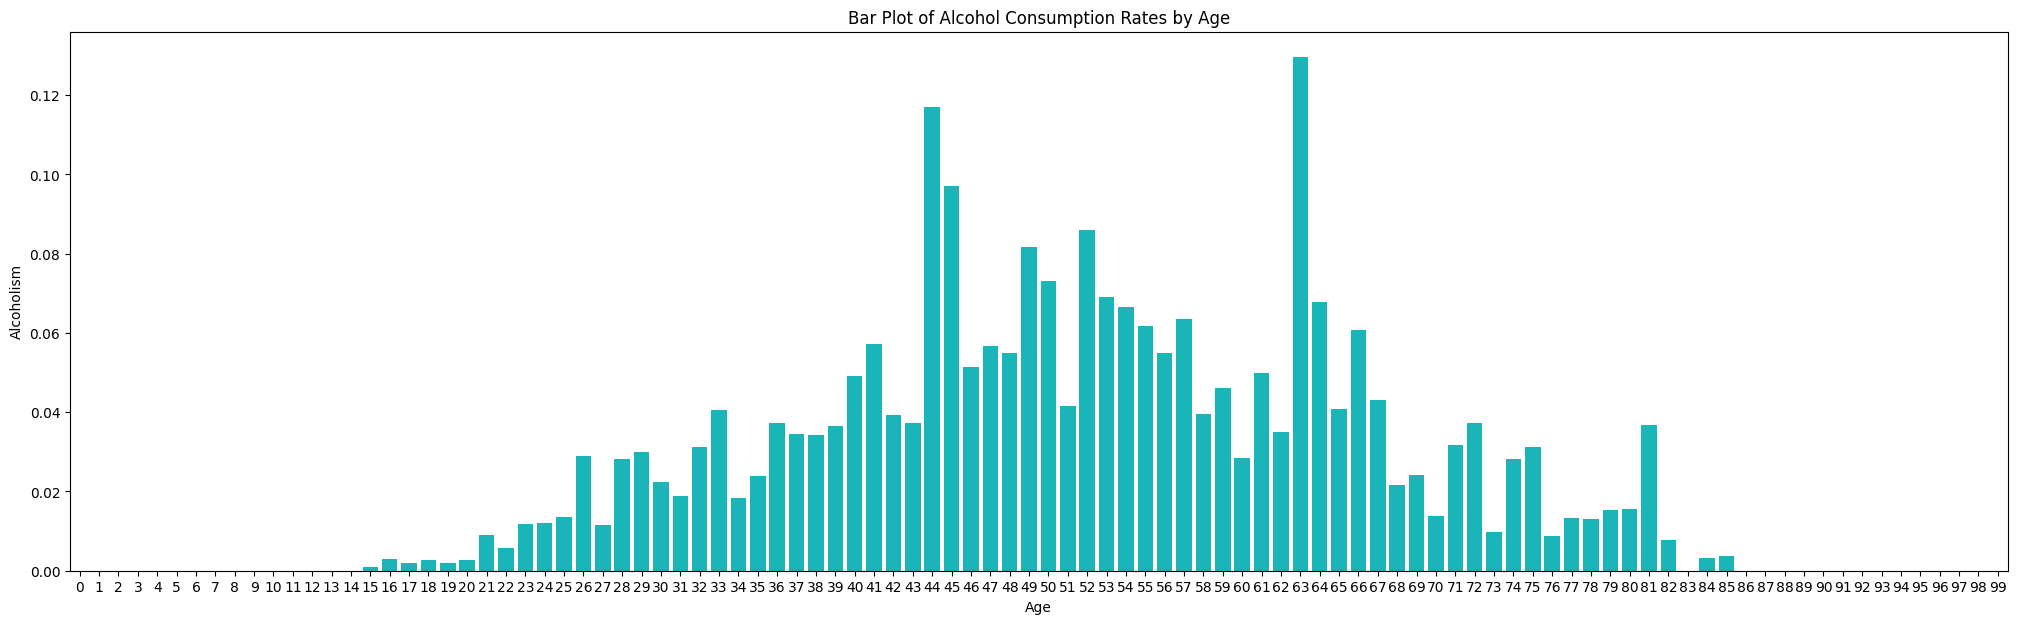

In [389]:
# Plotting bar for Alcohol consumption and Age 
# the significat amount of consumption of alcohol is between the age group od 40 - 60

plt.figure(figsize=(25,7))
sns.barplot(x='Age',y='Alcoholism',data = noshow1, errorbar = None)
plt.title("Bar Plot of Alcohol Consumption Rates by Age")
plt.show()

In [390]:
# calculating No-Show Rate:

rate = noshow1['No_Show'].astype(int).sum()/len(noshow1.index)
print(f'NoShow rate: {rate}')

NoShow rate: 0.2018753846710836


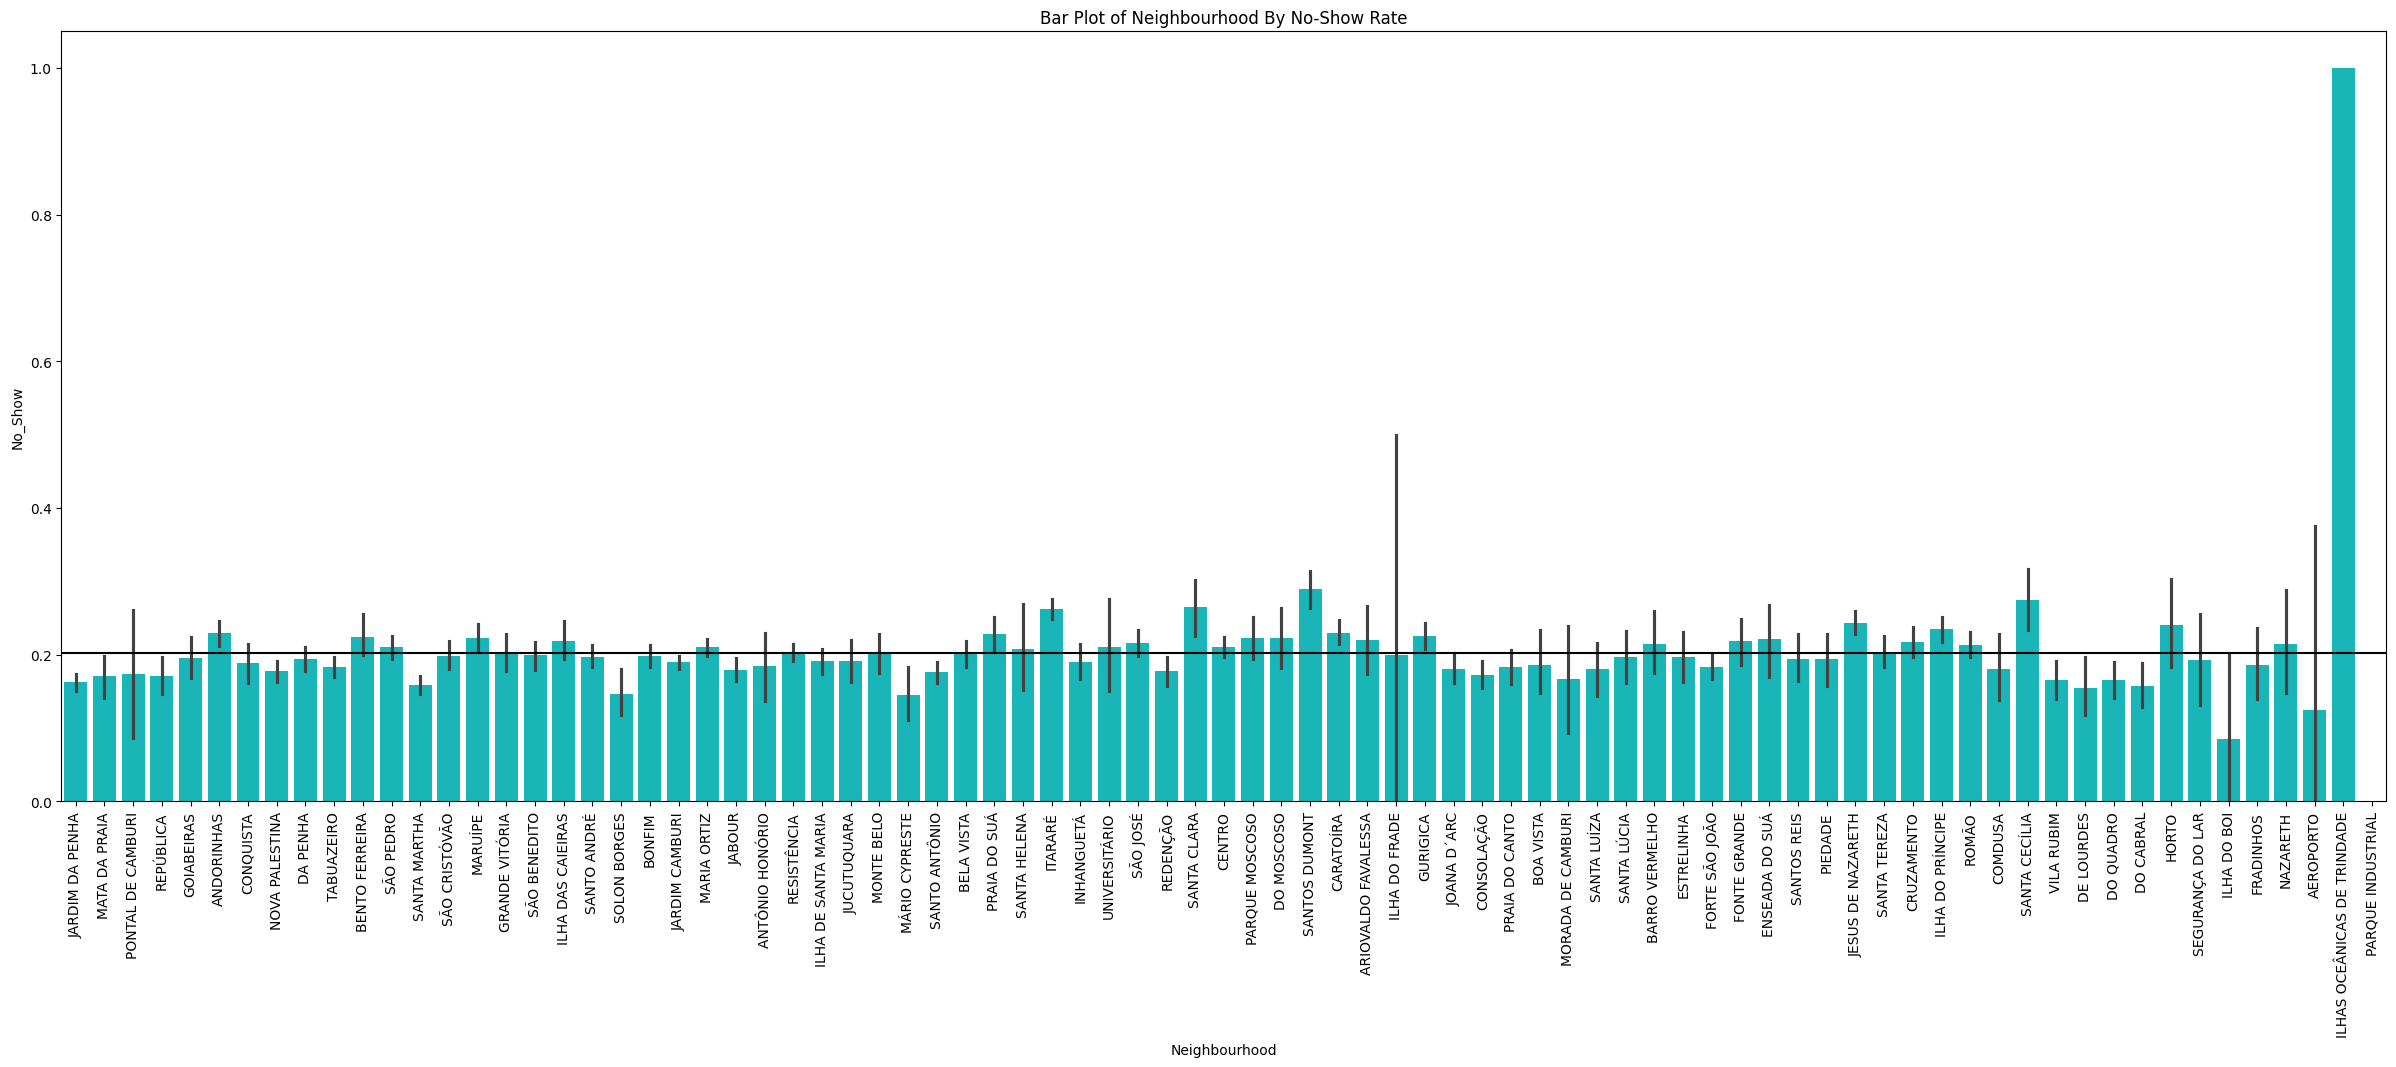

In [391]:
# noshow rate as per neighbourhood

plt.figure(figsize=(30,10))
sns.barplot(x='Neighbourhood', y = 'No_Show', data=noshow1)
plt.xticks(rotation=90)
plt.axhline(noshow_rate, color='black')
plt.title("Bar Plot of Neighbourhood By No-Show Rate")
plt.show()

# Multivariate Analysis

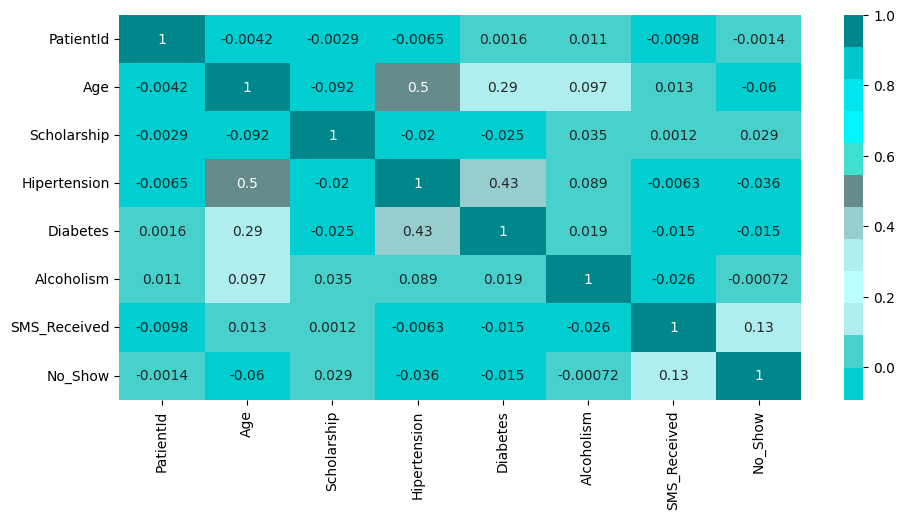

In [392]:
# Correlation matrix for numerical columns to examine how they are related to each other.

plt.figure(figsize=(11, 5))
sns.heatmap(noshow1.corr(numeric_only=True), annot=True, cmap='youngturqs')
plt.show()

## Multivariate Analysis Insights:
```
- A positive correlation was observed between hypertension and age (0.5) and between diabetes and age (0.29). Additionally, hypertension and diabetes show a correlation with each other. These relationships will be further explored using regplot and cross-tabulation.

- There is also a positive correlation (0.12) between "SMS Received" and "No Show."
```

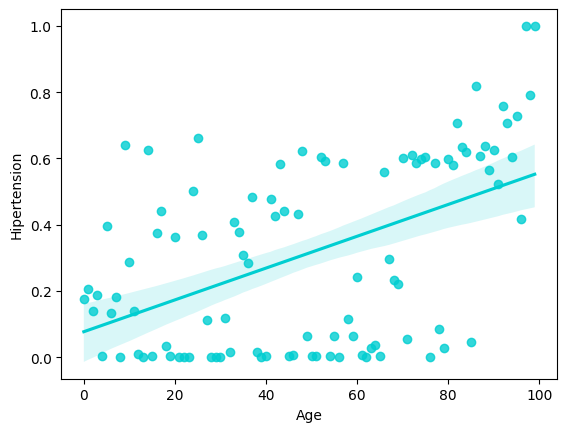

In [393]:
## Regplot of Hyptension and Age for analysing correlation 
hypertension = noshow1['Hipertension'].groupby(noshow1['Age']).mean()
age = noshow1['Age'].unique()

sns.regplot(x=age, y= hypertension)
plt.xlabel('Age')
plt.show()

## Regression Analysis of Age and Hypertension:
```
- The regression line shows a positive slope, indicating a positive correlation between age and hypertension. As age increases, hypertension becomes more prevalent, particularly among older individuals.
```

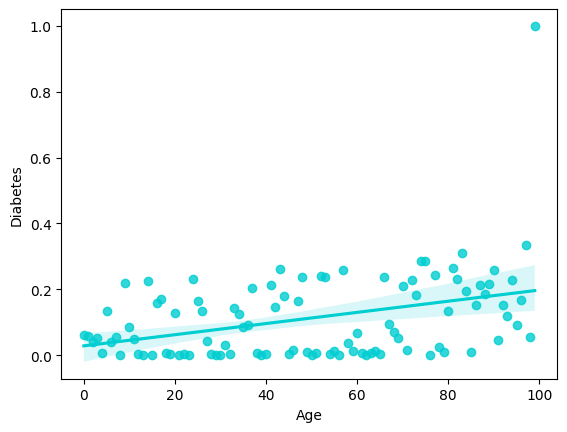

In [394]:
## Regplot of Diabetes and Age for analysing correlation 
diabetes = noshow1['Diabetes'].groupby(noshow1['Age']).mean()
age = noshow1['Age'].unique()

sns.regplot(x=age , y =diabetes)
plt.xlabel('Age')
plt.show()

## Regression Analysis of Age and Diabetes:
```
- The regression line shows a positive slope, indicating a positive correlation between age and Diabetes. As age increases, Diabetes becomes more prevalent, particularly among older individuals.
```

## Analyzing the Impact of "ScheduleDay" and "AppointmentDay"

In [395]:
## filtering out number of days between scheduled day and appointment day and storing it in new column "day_in_between"
noshow1['day_in_between'] = (noshow1['AppointmentDay'].dt.date - noshow1['ScheduledDay'].dt.date).apply(lambda x: x.days)

In [396]:
noshow1.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,day_in_between
0,2.990000e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False,0
1,5.590000e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False,0
2,4.260000e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False,0
3,8.680000e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,0
4,8.840000e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False,0


In [397]:
noshow1['day_in_between'].describe()

count    110484.000000
mean         10.185348
std          15.256805
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_in_between, dtype: float64

```
-thier are some negative values which can possibly create problem in our analysis lets see and convert them to 0
```

In [398]:
# total numbers of days when the appointment are on same day
len(noshow1.query('day_in_between==0'))

38545

In [399]:
# filtering negative days from our data 
noshow1.query('day_in_between<0')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,day_in_between
27033,7.840000e+12,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,False,False,False,False,1,False,True,-1
55226,7.900000e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,False,False,False,False,1,False,True,-1
64175,2.430000e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,False,False,False,False,0,False,True,-1
71533,9.980000e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,False,False,False,False,0,False,True,-6
72362,3.790000e+12,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,False,False,False,False,0,False,True,-1


In [400]:
## converting negative days to 0 
noshow1['day_in_between']= noshow1['day_in_between'].clip(lower=0)

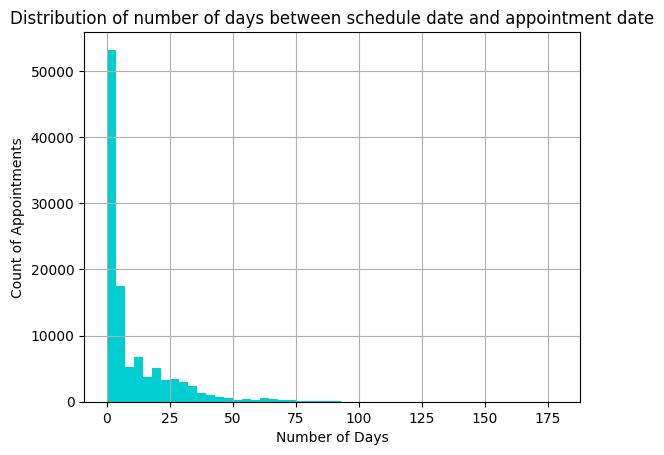

In [401]:
## plotting "day_in_between" column to analyse distribution of our data
noshow1['day_in_between'].hist(bins=50)
plt.xlabel("Number of Days")
plt.ylabel("Count of Appointments")
plt.title("Distribution of number of days between schedule date and appointment date")
plt.show()

## Impact of Same-Day Appointments:
```
- A significant number of appointments are scheduled for the same day, which occurs when the "ScheduleDay" and "AppointmentDay" are identical.

- Since our project is focused on understanding no-shows for appointments where the person books in advance but fails to attend, we will remove these same-day appointments (where "ScheduleDay" and "AppointmentDay" are the same) and focus on future appointments for more relevant analysis.
```


In [402]:
noshow1['day_in_between'].describe()

count    110484.000000
mean         10.185439
std          15.256733
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_in_between, dtype: float64

In [403]:
## calculating No Show Rate when appointment and scheduling are for same day
same_day=len(noshow1.query('day_in_between==0'))
noshow_same_day = len(noshow1.query('day_in_between==0 and No_Show==True'))

noshow_rate_for_same_day = noshow_same_day/same_day
print(noshow_rate_for_same_day)

0.04640726329442283


```
- The likelihood of a no-show is very low when an appointment is booked on the same day, with only a 4.6% no-show rate.

- Given this, we will proceed by removing same-day appointments from the analysis to focus on more relevant data regarding future appointments.
```

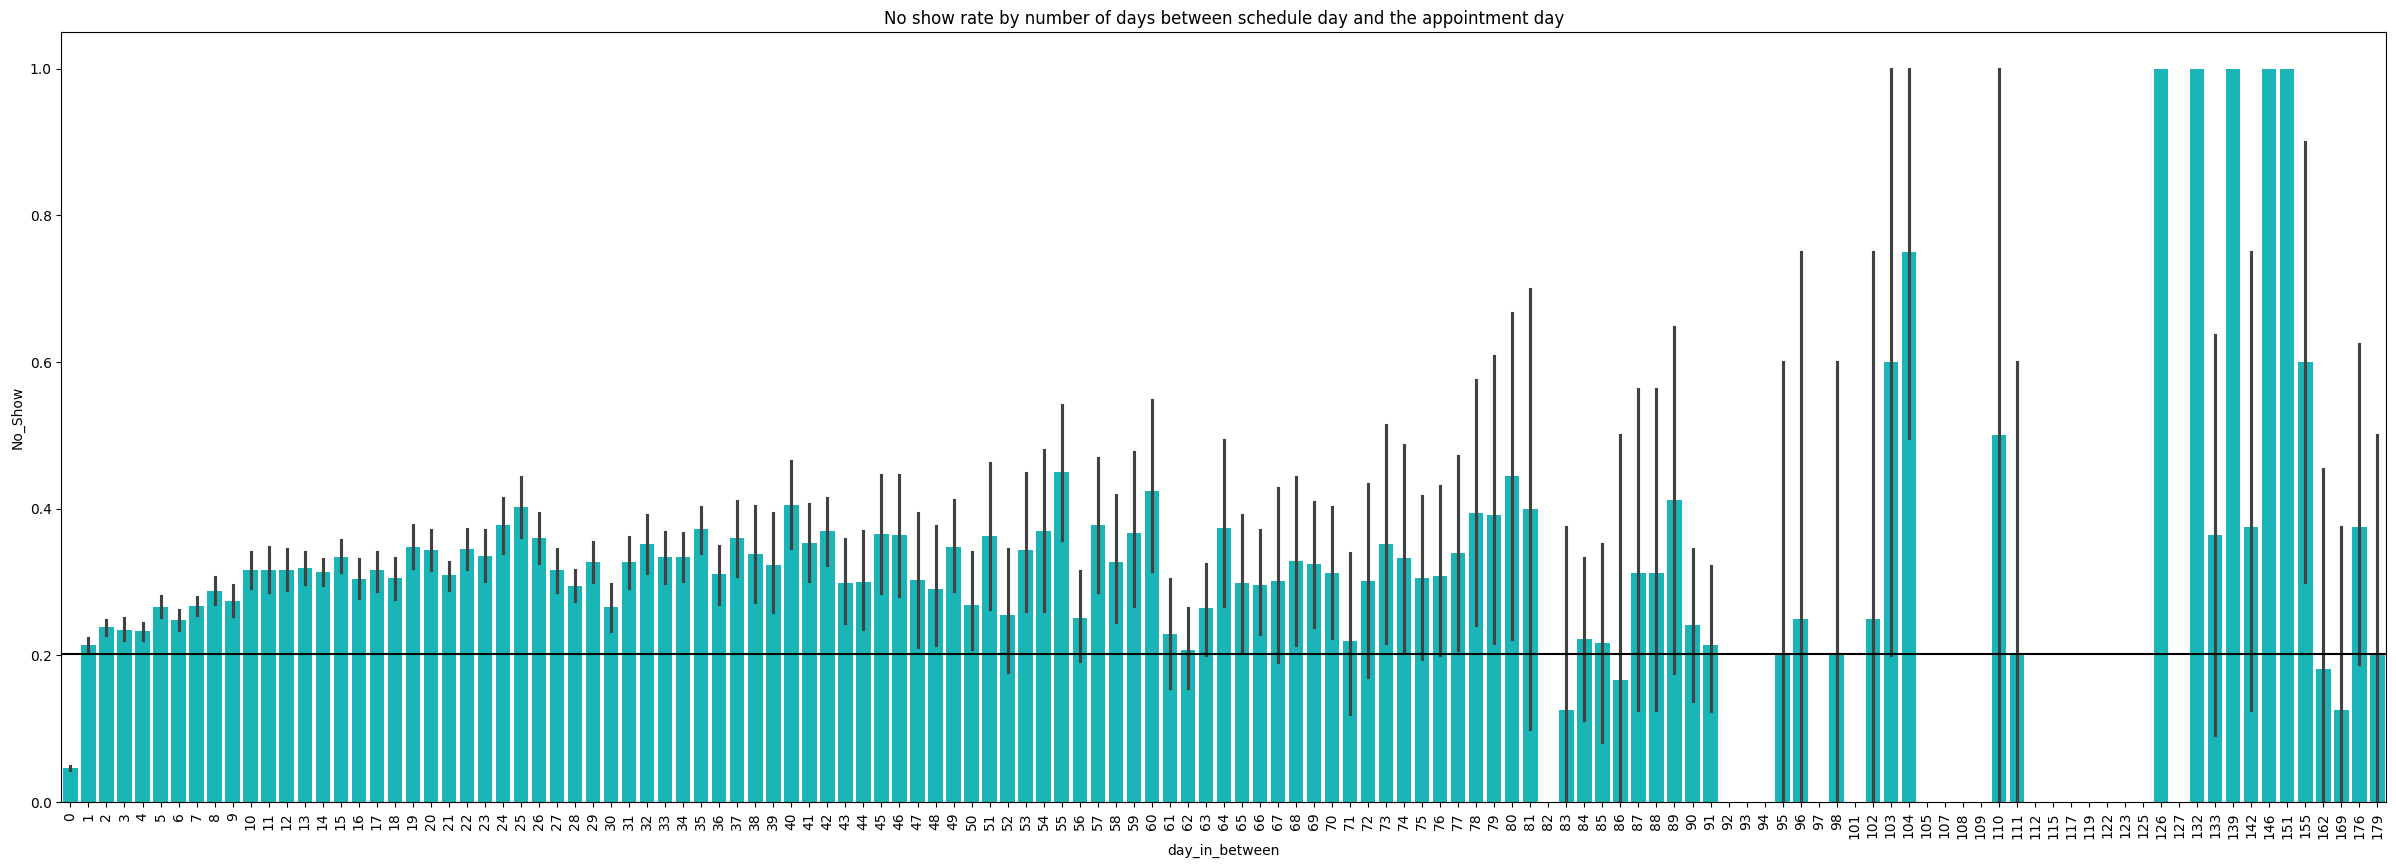

In [404]:
# plotting bar for "day in between" column to check the noshow rate as per day

plt.figure(figsize=(30,10))
sns.barplot(x='day_in_between', y = 'No_Show', data=noshow1)
plt.xticks(rotation=90)
plt.axhline(noshow_rate, color='black')
plt.title("No show rate by number of days between schedule day and the appointment day")
plt.show()

## No-Show Rate Analysis by Appointment Lead Time:
```
- The no-show rate is very low for appointments booked on the same day.

- After 10 days, the no-show rate begins to increase significantly.

- On certain days, the no-show rate reaches 100%, which is likely due to a small number of appointments being recorded for those days, resulting in high volatility.
```

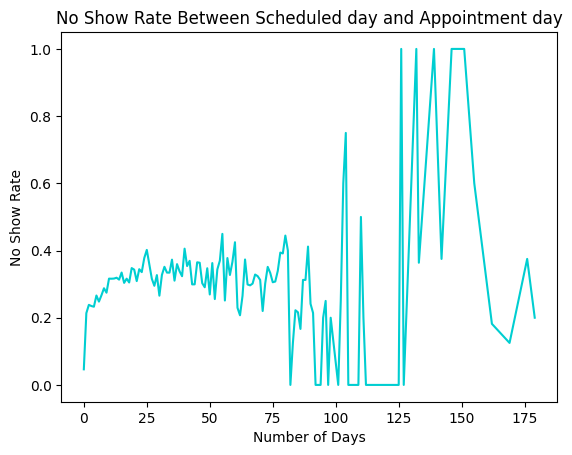

In [405]:
# plotting errorbar for "day_in_between" and "No-Show" to analyse trend 
noshow_rate_by_day = noshow1.groupby(['day_in_between'])['No_Show'].mean()
days = noshow1['day_in_between'].unique()
days = sorted(days)
plt.errorbar(x=days, y= noshow_rate_by_day)
plt.xlabel("Number of Days")
plt.ylabel("No Show Rate")
plt.title("No Show Rate Between Scheduled day and Appointment day")
plt.show()

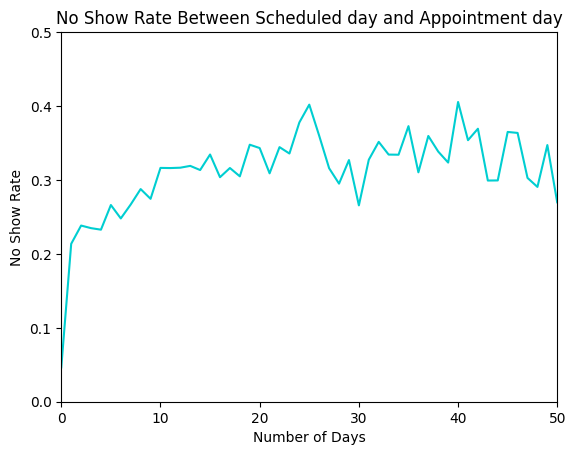

In [406]:
## let dig deeper to see the pattern in noshow rate 
noshow_rate_by_day = noshow1.groupby(['day_in_between'])['No_Show'].mean()
days = noshow1['day_in_between'].unique()
days = sorted(days)
plt.errorbar(x=days, y= noshow_rate_by_day)
plt.xlabel("Number of Days")
plt.ylabel("No Show Rate")
plt.title("No Show Rate Between Scheduled day and Appointment day")
plt.xlim(0,50)
plt.ylim(0,0.5)
plt.show()

## Influence of Lead Time on No-Show Rate:
```
- The data suggests that the length of time between scheduling and the actual appointment does impact attendance. A clear trend shows that no-show rates increase within the first 20 days after scheduling.

- Generally, the longer the gap between the scheduling date and the appointment date, the higher the likelihood of a no-show.

- Considering that there are nearly 38,000 records with a 0-day difference (same-day appointments), it is reasonable to reanalyze the data by excluding these entries. This refined subset is expected to exhibit higher no-show rates than previously observed.

- Let’s revisit the primary no-show visualizations and proceed with the filtered dataset for deeper insights.
```

In [407]:
# filtering out data dropping same day
noshow1 = noshow1.query('day_in_between >0')

In [408]:
noshow1.shape

(71934, 14)

In [409]:
## new noshow rate is 28% after filtering the data 
new_noshow_rate = noshow1['No_Show'].sum()/len(noshow1)
print(f'NoShow rate: {new_noshow_rate}')

NoShow rate: 0.2851919815386326


In [410]:
## lets analyse using bar plot 
def bar_plot(fdata, fxdata, fydata, fxlabel, fylabel, fytitle,ferrorbar):
    graph = sns.barplot(data=fdata, x = fxdata, y = fydata, errorbar=ferrorbar)
    graph.set(xlabel= fxlabel, ylabel = fylabel, title = fytitle)
    graph.set_ylim(0,0.5)
    plt.axhline(new_noshow_rate,color='black')
    return graph

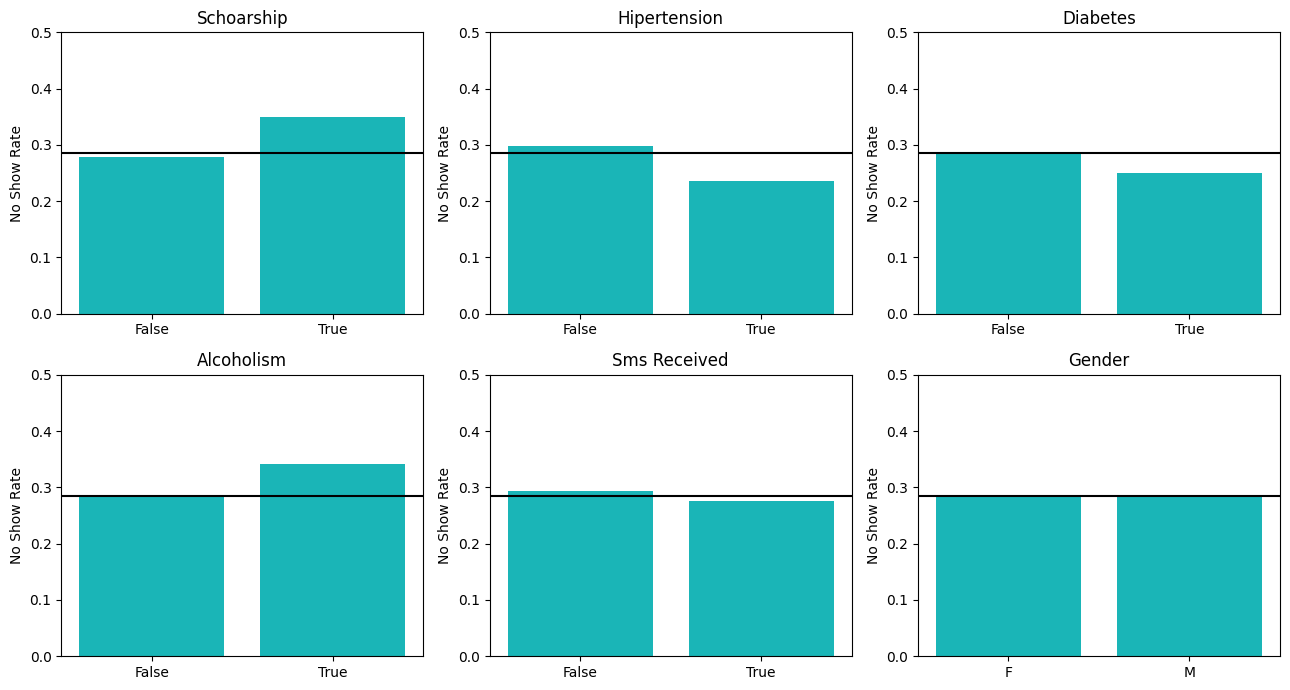

In [411]:
plt.figure(figsize=(13,7))

plt.subplot(2,3,1)
bar_plot(noshow1,'Scholarship','No_Show','','No Show Rate','Schoarship',None)

plt.subplot(2,3,2)
bar_plot(noshow1,'Hipertension', 'No_Show','','No Show Rate','Hipertension', None)

plt.subplot(2,3,3)
bar_plot(noshow1, 'Diabetes', 'No_Show', '', 'No Show Rate', 'Diabetes', None)

plt.subplot(2,3,4)
bar_plot(noshow1, 'Alcoholism', 'No_Show', '', 'No Show Rate', 'Alcoholism', None)

plt.subplot(2,3,5)
bar_plot(noshow1, 'SMS_Received', 'No_Show', '', 'No Show Rate', 'Sms Received', None)

plt.subplot(2,3,6)
bar_plot(noshow1, 'Gender', 'No_Show', '', 'No Show Rate', 'Gender', None)

plt.tight_layout()
plt.show()


## Re-evaluation of No-Show Rates by Patient Attributes:
```
- Individuals who received a scholarship still show a higher no-show rate.

- Patients with hypertension and diabetes also exhibit elevated no-show rates.

- Those who consume alcohol are more likely to miss their appointments.

- Interestingly, patients who received an SMS reminder now show a lower no-show rate, indicating the potential effectiveness of SMS notifications.
```

In [412]:
## SMS Received and Scholarship received
noshow_rate_sms= len(noshow1.query("No_Show == True and Scholarship == True and SMS_Received== True"))\
/len( noshow1.query("Scholarship== True and SMS_Received==True"))

print(f' If the person has received scholarship and sms then thier chances of not showing up is ({noshow_rate_sms}) i.e. 33%.')

 If the person has received scholarship and sms then thier chances of not showing up is (0.3378031383737518) i.e. 33%.


In [413]:
## person with hipertension , diabetes 

noshow_rate0 = len(noshow1.query("No_Show == True and Hipertension == True and Diabetes == True"))\
/len(noshow1.query("Hipertension== True and Diabetes == True"))

print(f' If the person has Hypertension and Diabetes then thier chances of not showing up is ({noshow_rate0}) i.e. 24%')

 If the person has Hypertension and Diabetes then thier chances of not showing up is (0.24243802592676825) i.e. 24%


In [414]:
# noshow rate for sms Received 
noshow_rate1 = len(noshow1.query('No_Show==True and SMS_Received==True'))/len(noshow1.query('SMS_Received == True'))

print(f' If the person has received sms then their chances of not showing up is ({noshow_rate1}) i.e. 27%')

 If the person has received sms then their chances of not showing up is (0.27573861073522776) i.e. 27%


In [415]:
# Noshow rate when SMS is not Received
noshow_rate2 = len(noshow1.query('No_Show == True and SMS_Received == False'))/len(noshow1.query('SMS_Received == False'))

print(f' If the person has not received SMS then thier chances of not showing up is ({noshow_rate2}) i.e. 29%')

 If the person has not received SMS then thier chances of not showing up is (0.2943886786243212) i.e. 29%


In [416]:
# Noshow Rate when peron is a drinker
noshow_rate3 = len(noshow1.query('No_Show == True and Alcoholism == True'))/len(noshow1.query('Alcoholism == True'))

print(f' If the person is consumes alcohol then thier chances of not showing up is ({noshow_rate3}) i.e. 34%')

 If the person is consumes alcohol then thier chances of not showing up is (0.3419746276889134) i.e. 34%


## Impact of SMS Reminders on No-Show Rate:
```
- The no-show rate for appointments where an SMS reminder was sent is 27.6%, which is lower than:

- The no-show rate for appointments without a reminder (29%), and

- The overall no-show rate of the filtered dataset (28.8%).

- This suggests that SMS reminders may have a positive effect in reducing missed appointments.
```

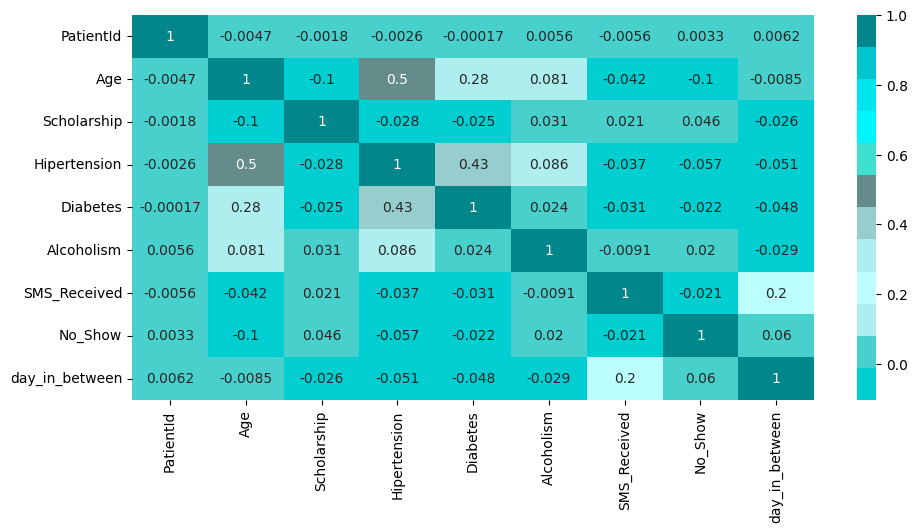

In [417]:
# Correlation matrix for numerical columns to examine how they are related to each other.


plt.figure(figsize=(11,5))
sns.heatmap(noshow1.corr(numeric_only=True), annot=True, cmap='youngturqs')
plt.show()

## Correlation Insights:
```
- There is a slight negative correlation between SMS received and No-Show rate (-0.02), indicating that receiving an SMS is very weakly associated with a lower chance of missing an appointment.

- Age also shows a small negative correlation with No-Show rate (-0.10), suggesting that older individuals are slightly more likely to attend their appointments.
```

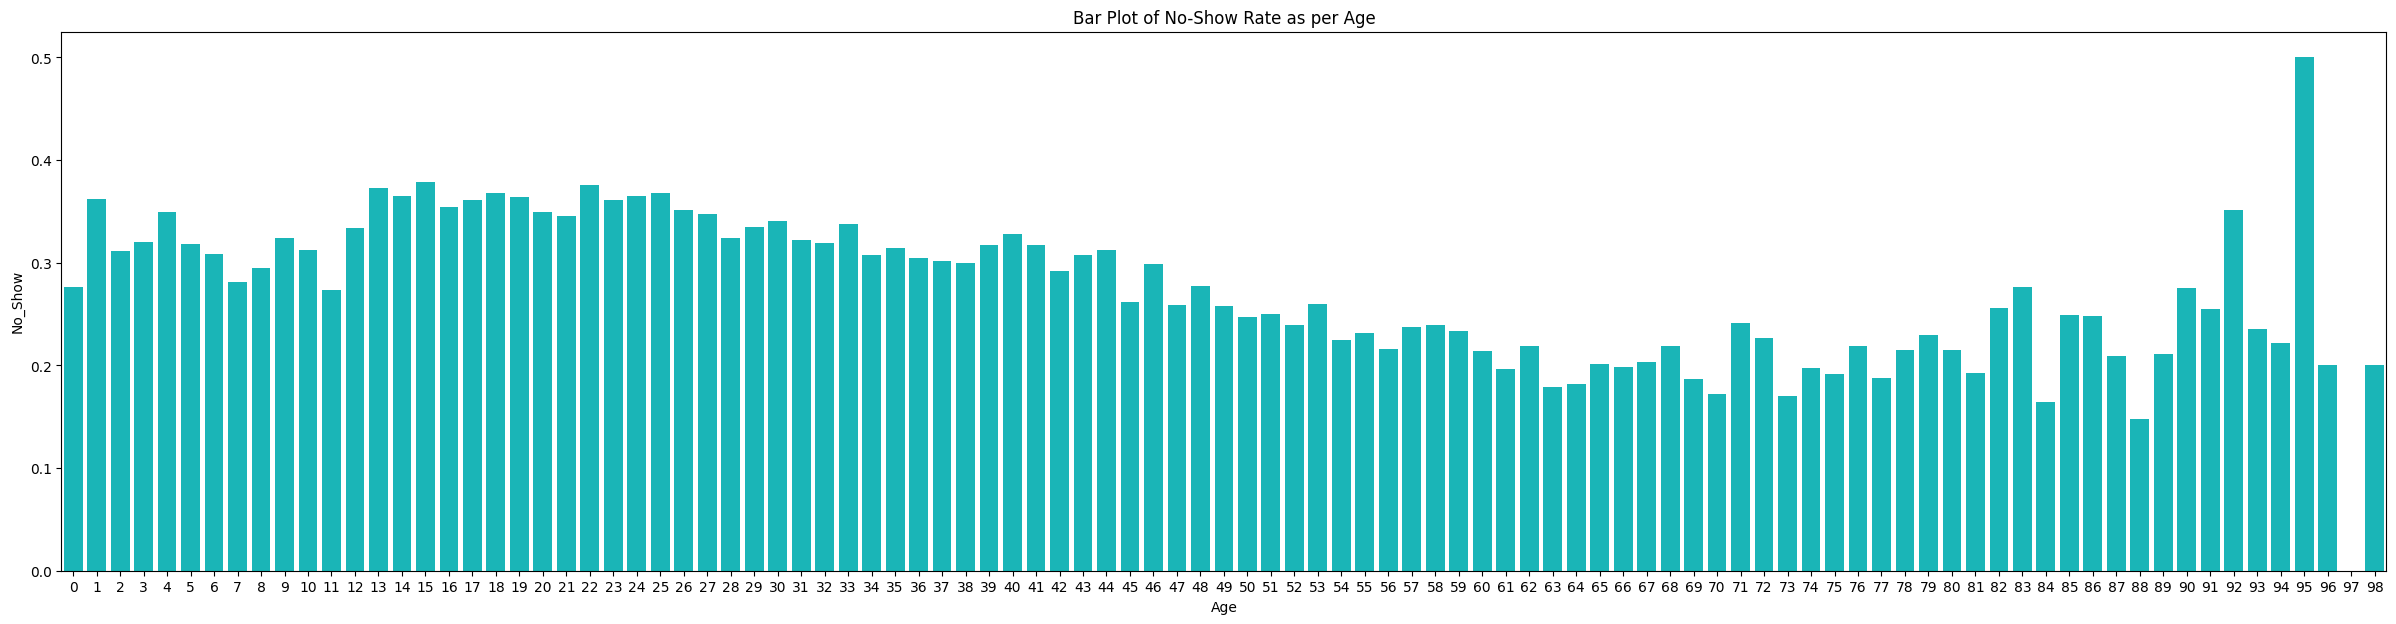

In [418]:
# plotting age and No-Show as we said above we can say with increse in age no show rate decreases

plt.figure(figsize=(30,7))
sns.barplot(x='Age',y ='No_Show', data = noshow1, errorbar=None)
plt.title("Bar Plot of No-Show Rate as per Age")
plt.show()

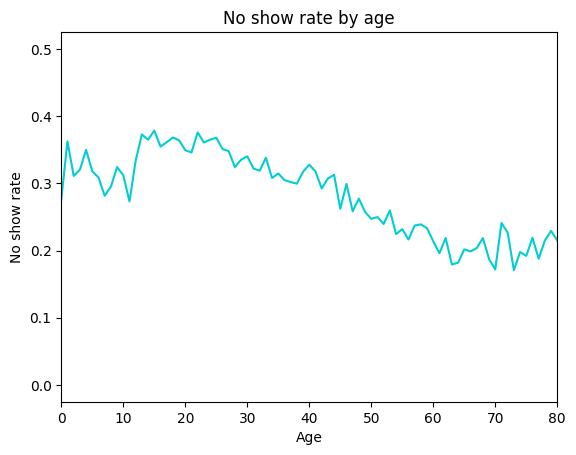

In [419]:
# no show rate still decreases with age in the filtered data
y_means = noshow1['No_Show'].groupby(noshow1['Age']).mean()
x_age = noshow1['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.xlim(0,80)
plt.show()

```
- with increase in age noshow rate is decreasing now 
```

# Conclusion 

```
Q1 Which Group of Patient Showup less for thier Scheduled appointmets?

- If the person has received scholarship and sms then thier chances of not showing up is (0.3378031383737518) i.e. 33%.
- If the person has Hypertension and Diabetes then thier chances of not showing up is (0.24243802592676825) i.e. 24%
- If the person is consumes alcohol then thier chances of not showing up is (0.3419746276889134) i.e. 34%

Q2 Does Receiveing SMS reduces No-Show?

- Yes receiving SMS reuces No-Show but the impact is very less.

Q3 Is thier a Relationship between the scheduling gap and No-Show?

-  Yes the length of time between scheduling and the actual appointment does impact No-Show. A clear trend shows that no-show rates increase within the first 20 days after scheduling.
- Generally, the longer the gap between the scheduling date and the appointment date, the higher the likelihood of a no-show.
```